## Imports

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

## Read Data from csv

In [2]:
dataX = pd.read_csv('../data/train.csv',delimiter='\t')
validX = pd.read_csv('../data/valid.csv',delimiter='\t')

In [3]:
dataY = pd.read_csv('../data/train_target.csv',header=None)
validY = pd.read_csv('../data/valid_target.csv',header=None)

In [ ]:
dataX.head()

In [4]:
np_train_x = np.array(dataX,dtype=np.float32)
np_train_y = np.array(dataY)
np_valid_x = np.array(validX,dtype=np.float32)
np_valid_y = np.array(validY)

In [ ]:
validX.head()

In [ ]:
dataY.head()

In [ ]:
validY.describe()

In [38]:
import itertools
def get_batches(_X, _Y, _batch_size):
    for i in itertools.cycle(range(0, len(_X), _batch_size)):
        yield (_X[i:i+_batch_size], _Y[i:i+_batch_size])

In [39]:
batch_gen = get_batches(np_train_x,np_train_y,batch_size)

In [40]:
next(batch_gen)[0].shape

(100, 49)

# Build an MLP
_______________________

### params

In [56]:
lr = 0.1
train_steps = 15
batch_size = 100
display_step = 1

### Network params

In [46]:
input_dim = dataX.shape[1]
num_classes = dataY.max()[0]
num_hidden_1 = input_dim
num_hidden_2 = input_dim 

### Graph Input

In [7]:
x = tf.placeholder(tf.float32, shape= [None,input_dim], name='X')
y = tf.placeholder(tf.int64, shape= [None], name = 'Y')

### Weights and Biases

In [8]:
print(num_hidden_1,num_hidden_2,input_dim,num_classes)

98 24 49 42


In [9]:
weights = {
    'h1' : tf.Variable(tf.random_normal(shape=[input_dim, num_hidden_1])),
    'h2' : tf.Variable(tf.random_normal(shape=[num_hidden_1, num_hidden_2])),
    'out': tf.Variable(tf.random_normal(shape=[num_hidden_2, num_classes]))
}
biases = {
    'h1' : tf.Variable(tf.random_normal(shape=[num_hidden_1])),
    'h2' : tf.Variable(tf.random_normal(shape=[num_hidden_2])),
    'out': tf.Variable(tf.random_normal(shape=[num_classes]))
}

### Create model

In [10]:
def mlp_model(_X, weights, biases):
    layer_1 = tf.matmul(_X, weights['h1']) + biases['h1']
    layer_2 = tf.matmul(layer_1, weights['h2']) + biases['h2']
    return tf.matmul(layer_2, weights['out']) + biases['out']

## Training Operations

In [60]:
pred = mlp_model(x,weights,biases)
# softmax loss
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(pred,y))
# training op
train_op = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

### Testing model

In [61]:
#batchX, batchY = next(batch_gen)
init_op = tf.initialize_all_variables()
losses = []
with tf.Session() as sess:
    sess.run(init_op)
    total_batches = len(np_train_x) // batch_size
    for step in range(total_batches):
        batchX, batchY = next(batch_gen)
        _, loss_val = sess.run([train_op,loss], feed_dict = {
                x : batchX,
                y : batchY.reshape([batch_size])
            })
        print(loss_val)
        if loss_val is not np.nan:
            losses.append(loss_val)


4.46835e+07
3.75878e+21
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyboardInterrupt: 

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

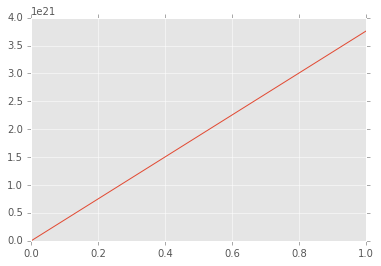

In [62]:
plt.plot(list(range(len(losses))),losses)

## Training

In [ ]:
# initialize all variables
init_op = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init_op)
    # training begins here
    for step in train_steps:
        total_batches = len(np_train_x) // batch_size
        
        for i in range(total_batches):
            batchX, batchY = next(batch_gen)
            sess.run(train_op, feed_dict = {
                    x : batchX,
                    y : batchY
                }
        

In [ ]:
y.get_shape

In [ ]:
_X = np_train_x[:10]
_Y = np_train_y[:10]

In [ ]:
y_one_hot = 

In [ ]:
one_hot = tf.one_hot(indices=[1], depth=num_classes)